<a href="https://colab.research.google.com/github/BerkayArdaa/ML_Binnary_Classification_For_Healthcare/blob/main/ML_Project_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv("Dataset/diabetes_binary_health_indicators_BRFSS2015.csv")
df.head()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [2]:
# import tensort
!pip install tensorflow scikit-learn matplotlib pandas numpy



In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers



In [4]:
# Load the Dataset
df = pd.read_csv("/content/Dataset/diabetes_binary_health_indicators_BRFSS2015.csv")
print("Dataset shape:", df.shape)
df.head()



Dataset shape: (253680, 22)


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
# Separate Inputs and Target
X = df.drop("Diabetes_binary", axis=1)
y = df["Diabetes_binary"]

print("Input features:", X.shape[1])
print("Target distribution:")
print(y.value_counts(normalize=True))


Input features: 21
Target distribution:
Diabetes_binary
0.0    0.860667
1.0    0.139333
Name: proportion, dtype: float64


In [6]:
# Split and Normalize Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [7]:
# Build the Neural Network
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # sigmoid for 0–1 output
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Train the Model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=25,
    batch_size=512,
    verbose=2
)



Epoch 1/25
318/318 - 7s - 22ms/step - accuracy: 0.8600 - loss: 0.3395 - val_accuracy: 0.8684 - val_loss: 0.3117
Epoch 2/25
318/318 - 1s - 2ms/step - accuracy: 0.8637 - loss: 0.3206 - val_accuracy: 0.8688 - val_loss: 0.3097
Epoch 3/25
318/318 - 1s - 2ms/step - accuracy: 0.8644 - loss: 0.3181 - val_accuracy: 0.8684 - val_loss: 0.3099
Epoch 4/25
318/318 - 1s - 2ms/step - accuracy: 0.8651 - loss: 0.3169 - val_accuracy: 0.8691 - val_loss: 0.3083
Epoch 5/25
318/318 - 1s - 2ms/step - accuracy: 0.8651 - loss: 0.3159 - val_accuracy: 0.8693 - val_loss: 0.3091
Epoch 6/25
318/318 - 1s - 2ms/step - accuracy: 0.8650 - loss: 0.3152 - val_accuracy: 0.8689 - val_loss: 0.3085
Epoch 7/25
318/318 - 1s - 2ms/step - accuracy: 0.8655 - loss: 0.3151 - val_accuracy: 0.8693 - val_loss: 0.3082
Epoch 8/25
318/318 - 1s - 2ms/step - accuracy: 0.8656 - loss: 0.3147 - val_accuracy: 0.8695 - val_loss: 0.3084
Epoch 9/25
318/318 - 1s - 2ms/step - accuracy: 0.8659 - loss: 0.3139 - val_accuracy: 0.8699 - val_loss: 0.3076


In [9]:
# Evaluate Performance
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {test_acc:.4f}")



1586/1586 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8643 - loss: 0.3145
✅ Test Accuracy: 0.8649


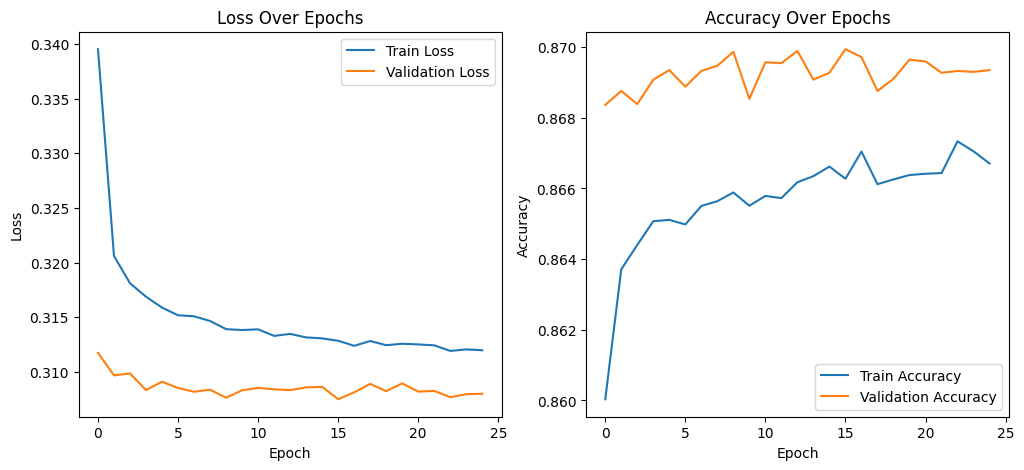

In [10]:
# Plot Learning Curves
plt.figure(figsize=(12,5))

# Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

# Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.show()



In [11]:
# Generate Predictions and Reports
from sklearn.metrics import classification_report, confusion_matrix

y_pred = (model.predict(X_test) >= 0.5).astype(int)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Confusion Matrix:
[[42924   743]
 [ 6111   958]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43667
         1.0       0.56      0.14      0.22      7069

    accuracy                           0.86     50736
   macro avg       0.72      0.56      0.57     50736
weighted avg       0.83      0.86      0.83     50736



In [12]:
# Save Results
plt.savefig("learning_curves.png")
model.save("diabetes_model.h5")



<Figure size 640x480 with 0 Axes>